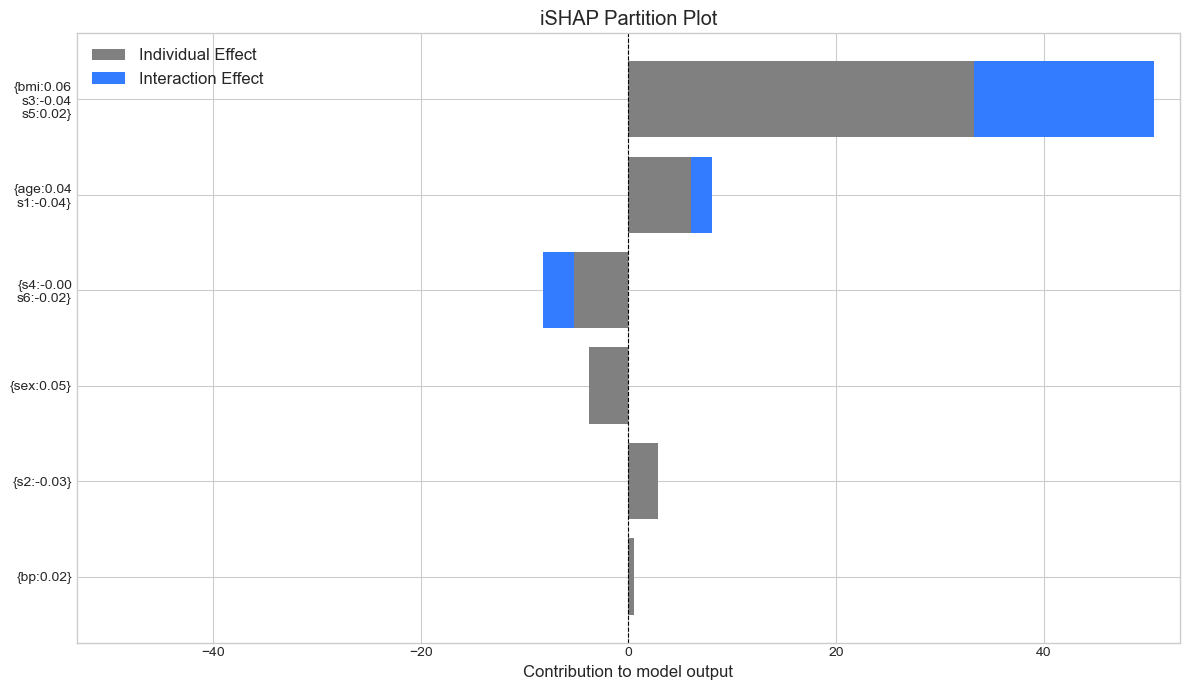

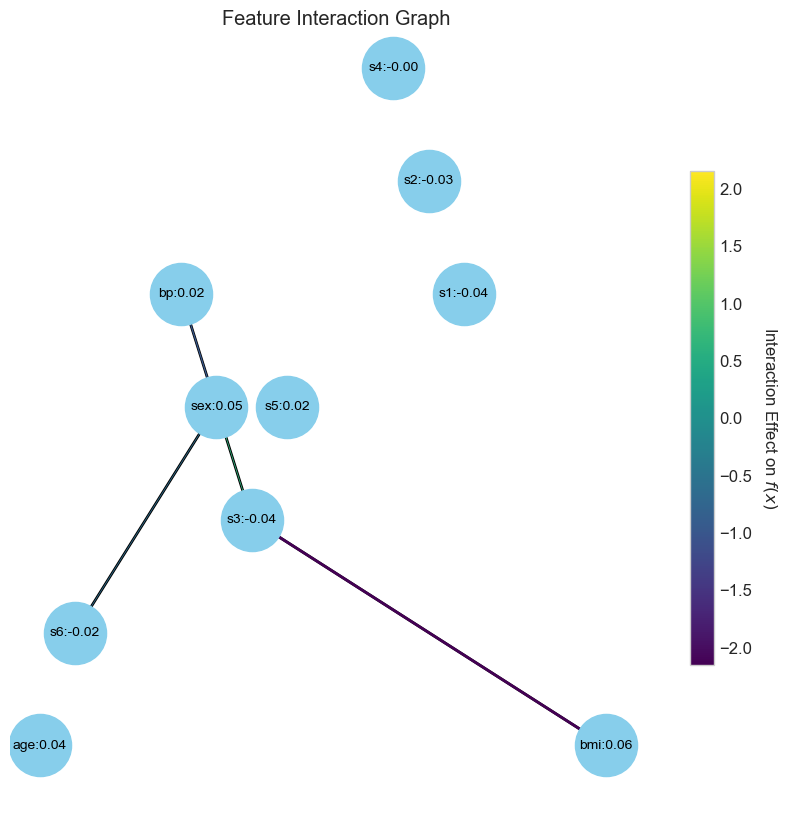


Explanation DataFrame:
                                           Coalition  Explanation Value  \
0  [bmi:0.061696206518683294, s3:-0.0434008456520...          33.323433   
1  [age:0.038075906433423026, s1:-0.0442234984244...           6.035193   
2  [s4:-0.002592261998183278, s6:-0.0176461251598...          -5.286267   
3                          [sex:0.05068011873981862]          -3.766217   
4                          [s2:-0.03482076283769895]           2.826983   
5                            [bp:0.0218723855140367]           0.509813   

   Interaction  
0   -17.258806  
1    -2.043903  
2     2.974087  
3     0.000000  
4     0.000000  
5     0.000000  
                                           Coalition  Explanation Value  \
0  [bmi:0.061696206518683294, s3:-0.0434008456520...          33.323433   
1  [age:0.038075906433423026, s1:-0.0442234984244...           6.035193   
2  [s4:-0.002592261998183278, s6:-0.0176461251598...          -5.286267   
3                          [sex

In [1]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from ishap import IShapExplainer
from sklearn.datasets import load_diabetes, load_iris
import numpy as np
# Load the toy dataset
dataset = load_diabetes()
X = dataset.data
y = dataset.target

feature_names = dataset.feature_names
# 1. Create a sample model and data with a clear interaction
model = RandomForestRegressor(random_state=42).fit(X, y)

# 2. Initialize the explainer
explainer = IShapExplainer(model, X, feature_names=feature_names, is_classification=False)
# 3. Choose an instance to explain
instance_to_explain = X[0]


# 4. Generate the partition plot
np.random.seed(42)  # For reproducibility
explainer.partition_plot(instance_to_explain, greedy=True,alpha_additivity=0.05,lambd=0.01)

# 5. Generate the interaction graph
explainer.interaction_plot(instance_to_explain)

# and the explanation object itself
np.random.seed(42)  # For reproducibility
explanation = explainer.explain(instance_to_explain, greedy=True,alpha_additivity=0.05,lambd=0.01)

# The object contains the partition values, singleton values, and interaction values.
# It can be converted to a pandas DataFrame for easy viewing.
print("\nExplanation DataFrame:")
print(explanation.to_table())
print(explanation)

## Classification with iSHAP-Exact
In the previous cell, we used iSHAP-Greedy. We can also use iSHAP-Exact, which iterates over all possible partitions. This is computationally expensive, but explores the whole search space. In practice, this is only feasible for few features, e.g. <20 and by restricting the maximal coalition size to a small number, e.g. 3 or 4.


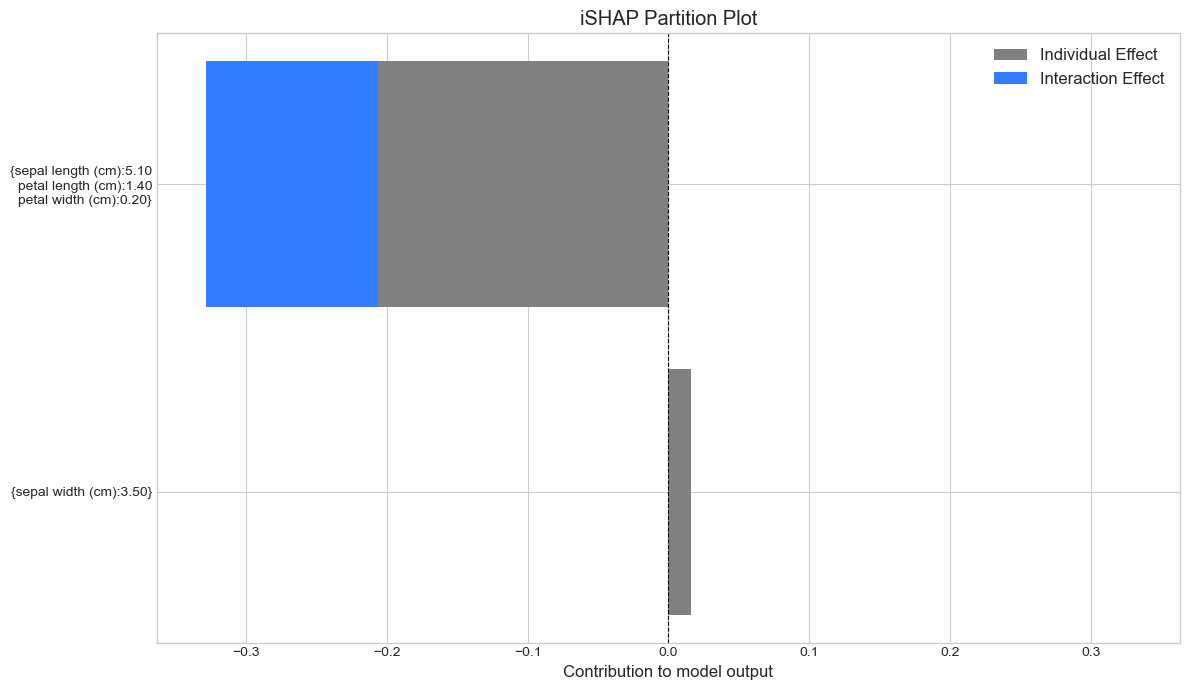

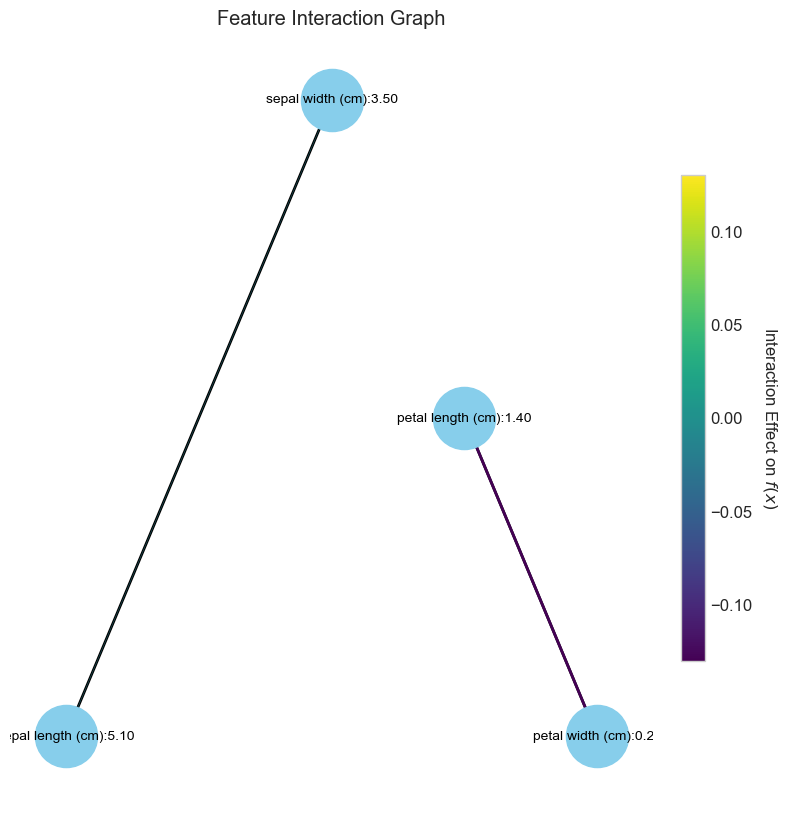


Iris Explanation DataFrame:
                                           Coalition  Explanation Value  \
0  [sepal length (cm):5.1, petal length (cm):1.4,...          -0.328343   
1                             [sepal width (cm):3.5]           0.015967   

   Interaction  
0    -0.122483  
1     0.000000  
                                           Coalition  Explanation Value  \
0  [sepal length (cm):5.1, petal length (cm):1.4,...          -0.328343   
1                             [sepal width (cm):3.5]           0.015967   

   Interaction  
0    -0.122483  
1     0.000000  


In [2]:
# Load the iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names

# Fit a RandomForestClassifier on the iris data
model_iris = RandomForestClassifier(random_state=42).fit(X_iris, y_iris)

# Initialize the IShapExplainer for classification
explainer_iris = IShapExplainer(model_iris, X_iris, feature_names=feature_names_iris, is_classification=True)

# Choose an instance to explain
instance_to_explain_iris = X_iris[0]

# Generate the partition plot
np.random.seed(42)  # For reproducibility
explainer_iris.partition_plot(instance_to_explain_iris, greedy=False, max_coalition_size=4, alpha_additivity=0.05, lambd=0.01)

# Generate the interaction graph
explainer_iris.interaction_plot(instance_to_explain_iris)

# Get the explanation object
np.random.seed(42)  # For reproducibility
explanation_iris = explainer_iris.explain(instance_to_explain_iris, greedy=False, max_coalition_size=4, alpha_additivity=0.05, lambd=0.01)

# Print the explanation DataFrame
print("\nIris Explanation DataFrame:")
print(explanation_iris.to_table())
print(explanation_iris)